<a href="https://githubtocolab.com/Sher016/IA/blob/main/01%20-%20exploración.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

In [32]:
import zipfile 
import pandas as pd

Preprocesado de los datos de entrenamiento

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn as sk
from sklearn import preprocessing as ps
from difflib import SequenceMatcher

In [34]:
#Carga de los datos de entrenamiento
#with zipfile.ZipFile("udea-ai4eng-20242.zip", 'r') as zip_ref:
    #zip_ref.extractall("data") 

df = pd.read_csv("data/train.csv")
df.head() 


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


In [79]:
df2 = df.copy()

In [40]:
print(df2.columns)
print(df.columns)

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO',
       'RENDIMIENTO_GLOBAL'],
      dtype='object')
Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO',
       'RENDIMIENTO_GLOBAL'],
      dtype='object')


Luego, se realizará la parte del encoding, esto debido a que se tienen muchas columnas con valores categoricos, que puedan ser entendido y procesado de mejor forma por los algoritmos de machine learning. Los algoritmos trabajan mejor con datos numéricos.

A continuación se realiza entonces 

In [80]:
df2['PERIODO'] = df2['PERIODO'].astype(float) #convertir a flotante la columna periodo
columns_to_expand = ['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',"FAMI_EDUCACIONPADRE","FAMI_EDUCACIONMADRE","FAMI_ESTRATOVIVIENDA"]
df2 = pd.get_dummies(df2, columns=columns_to_expand)
df2 = df2.drop(['ID',], axis=1)
df2


,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,FAMI_TIENEINTERNET,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 1 millón y menos de 2.5 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 2.5 millones y menos de 4 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 4 millones y menos de 5.5 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 5.5 millones y menos de 7 millones,...,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta,FAMI_ESTRATOVIVIENDA_Estrato 1,FAMI_ESTRATOVIVIENDA_Estrato 2,FAMI_ESTRATOVIVIENDA_Estrato 3,FAMI_ESTRATOVIVIENDA_Estrato 4,FAMI_ESTRATOVIVIENDA_Estrato 5,FAMI_ESTRATOVIVIENDA_Estrato 6,FAMI_ESTRATOVIVIENDA_Sin Estrato
0,20212.0,ENFERMERIA,BOGOTÁ,Si,No,medio-alto,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,20212.0,DERECHO,ATLANTICO,No,No,bajo,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
2,20203.0,MERCADEO Y PUBLICIDAD,BOGOTÁ,Si,No,bajo,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,20195.0,ADMINISTRACION DE EMPRESAS,SANTANDER,Si,No,alto,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,20212.0,PSICOLOGIA,ANTIOQUIA,Si,No,medio-bajo,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,20195.0,BIOLOGIA,LA GUAJIRA,Si,Si,medio-alto,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
692496,20212.0,PSICOLOGIA,NORTE SANTANDER,Si,No,bajo,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
692497,20183.0,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Si,Si,medio-bajo,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
692498,20195.0,PSICOLOGIA,TOLIMA,No,Si,bajo,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


Tomamos las columnas que tiene valores de "si" y "no" y se convierten a 0 y 1

In [81]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['FAMI_TIENEINTERNET', 'ESTU_PAGOMATRICULAPROPIO',"RENDIMIENTO_GLOBAL"] 

encoders = {}

for col in categorical_columns:
    label_encoder = LabelEncoder()
    df2[col] = label_encoder.fit_transform(df2[col])
    encoders[col] = label_encoder

df2

,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,FAMI_TIENEINTERNET,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 1 millón y menos de 2.5 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 2.5 millones y menos de 4 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 4 millones y menos de 5.5 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 5.5 millones y menos de 7 millones,...,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta,FAMI_ESTRATOVIVIENDA_Estrato 1,FAMI_ESTRATOVIVIENDA_Estrato 2,FAMI_ESTRATOVIVIENDA_Estrato 3,FAMI_ESTRATOVIVIENDA_Estrato 4,FAMI_ESTRATOVIVIENDA_Estrato 5,FAMI_ESTRATOVIVIENDA_Estrato 6,FAMI_ESTRATOVIVIENDA_Sin Estrato
0,20212.0,ENFERMERIA,BOGOTÁ,1,0,2,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,20212.0,DERECHO,ATLANTICO,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
2,20203.0,MERCADEO Y PUBLICIDAD,BOGOTÁ,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,20195.0,ADMINISTRACION DE EMPRESAS,SANTANDER,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,20212.0,PSICOLOGIA,ANTIOQUIA,1,0,3,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,20195.0,BIOLOGIA,LA GUAJIRA,1,1,2,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
692496,20212.0,PSICOLOGIA,NORTE SANTANDER,1,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
692497,20183.0,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,1,1,3,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
692498,20195.0,PSICOLOGIA,TOLIMA,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [48]:
!pip install category_encoders
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler


   ---------------------------------------- 0.0/82.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/82.0 kB ? eta -:--:--
   -------------- ------------------------- 30.7/82.0 kB 435.7 kB/s eta 0:00:01
   ----------------------------- ---------- 61.4/82.0 kB 465.5 kB/s eta 0:00:01
   ---------------------------------------- 82.0/82.0 kB 574.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/232.9 kB ? eta -:--:--
   ---------- ----------------------------- 61.4/232.9 kB 3.2 MB/s eta 0:00:01
   --------------- ----------------------- 92.2/232.9 kB 871.5 kB/s eta 0:00:01
   --------------------- ------------------ 122.9/232.9 kB 1.0 MB/s eta 0:00:01
   ------------------------- ------------ 153.6/232.9 kB 833.5 kB/s eta 0:00:01
   ---------------------------------------- 232.9/232.9 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
    --------------------------------------- 0.2/9.9 MB 5.6 MB/s eta 0:00:02
   -


Se realiza un target encoding en dos columnas (ESTU_PRGM_ACADEMICO y ESTU_PRGM_DEPARTAMENTO) para convertir las variables categóricas en variables numéricas de acuerdo con su relación con la variable objetivo (RENDIMIENTO_GLOBAL), utilizando la técnica de TargetEncoder.

In [ ]:

target_encoder = TargetEncoder(
    cols=['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO'],
    drop_invariant=False,
    handle_missing='return_nan',
    handle_unknown='value',
    min_samples_leaf=20,
    smoothing=10,
    return_df=True,
    verbose=0
)
preprocess_pipeline = Pipeline([
    ('target_encoding', target_encoder)
])
X = df2[['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO']]
y = df2['RENDIMIENTO_GLOBAL']

preprocess_pipeline.fit(X, y)

transformed_data = preprocess_pipeline.transform(X)
transformed_data


,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO
0,1.662742,1.458950
1,1.441590,1.481302
2,1.741652,1.458950
3,1.622211,1.404329
4,1.543373,1.407370
...,...,...
692495,1.054874,1.575973
692496,1.543373,1.710510
692497,1.707842,1.458950
692498,1.543373,1.595839


Graficamos para observar que los datos a los cuales se les realizó la transformacion tengan una distribución muy cernana a la normal,
de esta forma es más fácil para el modelo entrenarse

(array([  1213.,   4018.,  12613.,   9623.,  43221.,  56038., 162952.,
        219394., 177780.,   5648.]),
 array([0.08733658, 0.28693958, 0.48654258, 0.68614558, 0.88574859,
        1.08535159, 1.28495459, 1.48455759, 1.68416059, 1.88376359,
        2.0833666 ]),
 <BarContainer object of 10 artists>)

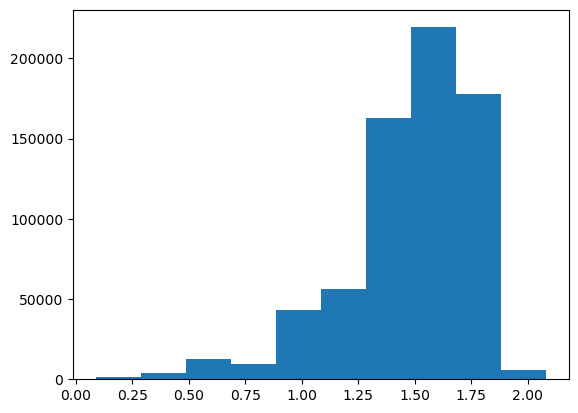

In [50]:
plt.hist(transformed_data['ESTU_PRGM_ACADEMICO'])

(array([1.40180e+04, 0.00000e+00, 1.28364e+05, 3.67767e+05, 3.49700e+04,
        4.68500e+04, 2.93760e+04, 6.92260e+04, 1.88900e+03, 4.00000e+01]),
 array([1.23776573, 1.30132492, 1.3648841 , 1.42844329, 1.49200248,
        1.55556166, 1.61912085, 1.68268003, 1.74623922, 1.80979841,
        1.87335759]),
 <BarContainer object of 10 artists>)

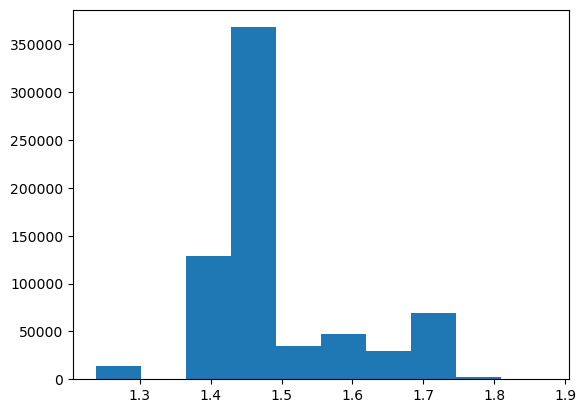

In [51]:
plt.hist(transformed_data['ESTU_PRGM_DEPARTAMENTO'])

Reemplazar las columnas con la trasnformacion realizada

In [53]:
df2['ESTU_PRGM_DEPARTAMENTO'] = transformed_data['ESTU_PRGM_DEPARTAMENTO']
df2['ESTU_PRGM_ACADEMICO'] = transformed_data['ESTU_PRGM_ACADEMICO']
df2


,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,FAMI_TIENEINTERNET,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 1 millón y menos de 2.5 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 2.5 millones y menos de 4 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 4 millones y menos de 5.5 millones,ESTU_VALORMATRICULAUNIVERSIDAD_Entre 5.5 millones y menos de 7 millones,...,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta,FAMI_ESTRATOVIVIENDA_Estrato 1,FAMI_ESTRATOVIVIENDA_Estrato 2,FAMI_ESTRATOVIVIENDA_Estrato 3,FAMI_ESTRATOVIVIENDA_Estrato 4,FAMI_ESTRATOVIVIENDA_Estrato 5,FAMI_ESTRATOVIVIENDA_Estrato 6,FAMI_ESTRATOVIVIENDA_Sin Estrato
0,20212.0,1.662742,1.458950,1,0,2,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,20212.0,1.441590,1.481302,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
2,20203.0,1.741652,1.458950,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,20195.0,1.622211,1.404329,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,20212.0,1.543373,1.407370,1,0,3,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,20195.0,1.054874,1.575973,1,1,2,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
692496,20212.0,1.543373,1.710510,1,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
692497,20183.0,1.707842,1.458950,1,1,3,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
692498,20195.0,1.543373,1.595839,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


Ahora, se realiza un conteo para observar número de valores nulos en cada columna del DataFrame.

In [54]:
df2.isna().sum()

PERIODO                                                                    0
ESTU_PRGM_ACADEMICO                                                        0
ESTU_PRGM_DEPARTAMENTO                                                     0
FAMI_TIENEINTERNET                                                         0
ESTU_PAGOMATRICULAPROPIO                                                   0
RENDIMIENTO_GLOBAL                                                         0
ESTU_VALORMATRICULAUNIVERSIDAD_Entre 1 millón y menos de 2.5 millones      0
ESTU_VALORMATRICULAUNIVERSIDAD_Entre 2.5 millones y menos de 4 millones    0
ESTU_VALORMATRICULAUNIVERSIDAD_Entre 4 millones y menos de 5.5 millones    0
ESTU_VALORMATRICULAUNIVERSIDAD_Entre 5.5 millones y menos de 7 millones    0
ESTU_VALORMATRICULAUNIVERSIDAD_Entre 500 mil y menos de 1 millón           0
ESTU_VALORMATRICULAUNIVERSIDAD_Menos de 500 mil                            0
ESTU_VALORMATRICULAUNIVERSIDAD_Más de 7 millones                           0

No hay valores nulos para ninguna columna, esto quiere decir que se tiene en dataset listo para seguir realizandole operaciones. Ahora, se realizará una matriz de correlacion, eso debido a que se tienen datos numericos y los cálculos necesarios para esta son solo válidos para variables que tienen valores numéricos.
La matriz de correlación permite identificar si existe una relación lineal entre las variables numéricas. Esto es útil para entender cómo los diferentes factores pueden influir en el evento objetivo. Siendo entonces la correlacion más alta 1 o -1, y la mas alejada, es decir, una correlación baja cuando el coeficiente de correlación está cerca de 0.

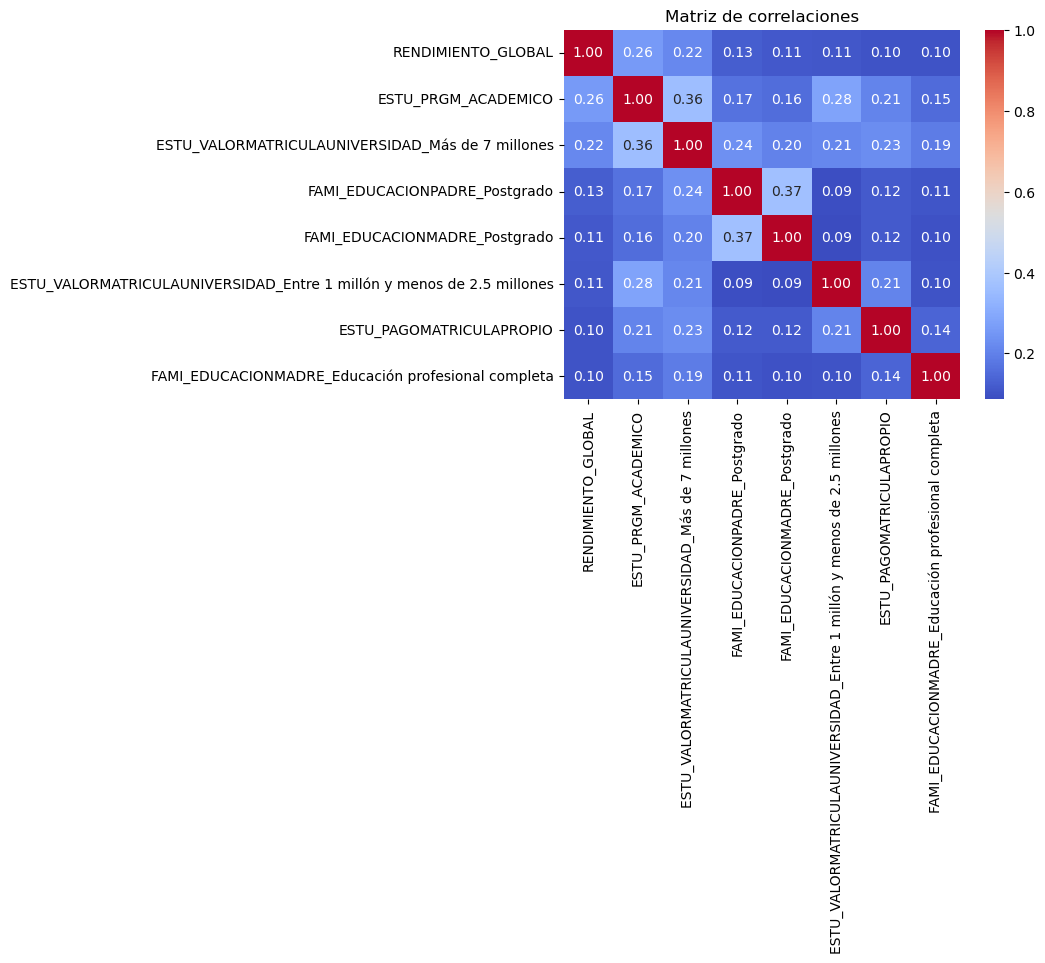

In [55]:
corr_matrix = np.abs(df2.corr())
top = corr_matrix['RENDIMIENTO_GLOBAL'].sort_values(ascending=False)[0:8].index
corr_matrix = corr_matrix.loc[top, top]
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de correlaciones")
plt.show()

In [56]:
corr_matrix = np.abs(df2.corr())
corr_as_dec = corr_matrix['RENDIMIENTO_GLOBAL'].sort_values(ascending=False)
corr_as_dec

RENDIMIENTO_GLOBAL                                                         1.000000
ESTU_PRGM_ACADEMICO                                                        0.257942
ESTU_VALORMATRICULAUNIVERSIDAD_Más de 7 millones                           0.215324
FAMI_EDUCACIONPADRE_Postgrado                                              0.125027
FAMI_EDUCACIONMADRE_Postgrado                                              0.112512
ESTU_VALORMATRICULAUNIVERSIDAD_Entre 1 millón y menos de 2.5 millones      0.110025
ESTU_PAGOMATRICULAPROPIO                                                   0.103880
FAMI_EDUCACIONMADRE_Educación profesional completa                         0.101146
ESTU_HORASSEMANATRABAJA_0                                                  0.097500
FAMI_ESTRATOVIVIENDA_Estrato 4                                             0.094017
ESTU_PRGM_DEPARTAMENTO                                                     0.090564
FAMI_EDUCACIONPADRE_Educación profesional completa                         0

Finalmente se observa que la variable que obtuvo menor correlacion con respecto al target fue el periodo, mientras que la variable que mejor correlacion arojó fue el valor de  la matricula de la universidad. Esto es coherente ya que podria ser que al tener acceso a una educación más cara, se tienen mejores condiciones financieras, mejores condiciones financieras que se traducen en mejores condiciones para estudiar de forma comoda o solo dedicarse a estudiar, por ejemplo.

A continuacion se importan las librerias necesarias

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve,train_test_split,cross_validate, ShuffleSplit,GridSearchCV
from sklearn.linear_model import LinearRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,average_precision_score,mean_absolute_error,r2_score,confusion_matrix,classification_report
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
import textwrap
from sklearn.decomposition import NMF,PCA
from itertools import product
from sklearn.metrics import f1_score,accuracy_score,recall_score
!pip install catboost


In [58]:
#Función para reportar el error del modelo
def report_cv_score(z):
    
    #RMSE en prueba y entrenamiento
    lr_ts_score = z['test_score']*(-1)
    lr_tr_score = z['train_score']*(-1)
    lin_rmse_ts = np.sqrt(lr_ts_score)
    lin_rmse_tr = np.sqrt(lr_tr_score)
    print("RMSLE Test: ", "{:.5f}".format(np.mean(lin_rmse_ts)), "(±", "{:.8f}".format(np.std(lin_rmse_ts)),")")
    print("RMSLE Train: ", "{:.5f}".format(np.mean(lin_rmse_tr)), "(±", "{:.8f}".format(np.std(lin_rmse_tr)),")")

In [59]:
#Función para calcular el RMSLE de los modelos implementados
def RMSLE(y_actual, y_pred):
    
    return np.sqrt(mean_squared_error(y_actual, y_pred))

In [60]:
train = df2

X = train.drop(['RENDIMIENTO_GLOBAL'],axis = 1)
y = train['RENDIMIENTO_GLOBAL'].values


Se realiza la particion de los datos

In [61]:
#--------Partición de los datos------------

test_size = 0.3
val_size  = test_size/(1-test_size) # Elementos de validación

print (X.shape, y.shape)
print ("test size %.2f"%test_size)
print ("val size is %.2f (relative to %.2f) "%(val_size, 1-test_size))

#Xtv, ytv son los datos que se usan para entrenar el modelo
#Xts, yts son los datos que se usan para probar el modelo (solo se usan para el testeo final de los modelos que se seleccionen)
Xtv, Xts, ytv, yts = train_test_split(X, y, test_size=test_size)
print (Xtv.shape, Xts.shape)

(692500, 49) (692500,)
test size 0.30
val size is 0.43 (relative to 0.70) 
(484750, 49) (207750, 49)


A continuación se realizará la prueba con dos modelos diferentes a los utilizados anteriorment, debido a que ninguno de ellos dio
un porcentaje de accuracy y F1 bueno. Se utiliza entonces un Gradient Boosting el cual es un tipo de modelo predictivo basado en un enfoque de "boosting", donde se utiliza una secuencia de modelos débiles (generalmente árboles de decisión) para crear un modelo fuerte que haga mejores predicciones y el CatBoost el cual es una implementación específica de Gradient Boosting, diseñada para trabajar de manera eficiente con datos categóricos . Es un modelo de boosting de árboles que optimiza el proceso de entrenamiento, haciendo que el modelo sea más rápido y más preciso que las versiones tradicionales de Gradient Boosting.

In [62]:
#Modelo1 = DecisionTreeClassifier(max_depth=5)
from catboost import CatBoostClassifier
Modelo1 = CatBoostClassifier(iterations=1000,leaf_estimation_method="Newton")
Modelo2 = GradientBoostingClassifier(max_depth=5)

Utilizamos de nuevo la función para evaluar las metricas escogidas

In [ ]:
def train_test_evaluate(model_name, model, X_train, y_train, X_test, y_test):
    # Entrenar el modelo con los datos de entrenamiento
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    F1= f1_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test,y_pred, average="weighted")
    
    result_df = pd.DataFrame(
        data=[[model_name, rmse, r2 , accuracy, F1 ,recall]],
        columns=["Model",'RMSE', 'R2 Score', "Accuracy", "F1 score", "Recall"]
    )
    return result_df


Obtenemos las metricas para el arbol de desición

In [ ]:
train_test_evaluate("CatBoost", Modelo1,Xtv,ytv,Xts,yts)

0:	learn: 1.3796011	total: 295ms	remaining: 4m 54s
1:	learn: 1.3733054	total: 432ms	remaining: 3m 35s
2:	learn: 1.3674464	total: 585ms	remaining: 3m 14s
3:	learn: 1.3619501	total: 735ms	remaining: 3m 3s
4:	learn: 1.3569247	total: 965ms	remaining: 3m 12s
5:	learn: 1.3521893	total: 1.19s	remaining: 3m 16s
6:	learn: 1.3476756	total: 1.35s	remaining: 3m 10s
7:	learn: 1.3434816	total: 1.5s	remaining: 3m 5s
8:	learn: 1.3394267	total: 1.63s	remaining: 2m 59s
9:	learn: 1.3357357	total: 1.81s	remaining: 2m 59s
10:	learn: 1.3319632	total: 1.95s	remaining: 2m 55s
11:	learn: 1.3285934	total: 2.09s	remaining: 2m 52s
12:	learn: 1.3252680	total: 2.24s	remaining: 2m 49s
13:	learn: 1.3221827	total: 2.39s	remaining: 2m 48s
14:	learn: 1.3191976	total: 2.52s	remaining: 2m 45s
15:	learn: 1.3163270	total: 2.67s	remaining: 2m 44s
16:	learn: 1.3138573	total: 2.8s	remaining: 2m 41s
17:	learn: 1.3113850	total: 2.93s	remaining: 2m 39s
18:	learn: 1.3087802	total: 3.06s	remaining: 2m 38s
19:	learn: 1.3064015	total

,Model,RMSE,R2 Score,Accuracy,F1 score,Recall
0,CatBoost,1.362717,-0.480628,0.432245,0.418779,0.432245


In [95]:
train_test_evaluate("gradientboost",Modelo2,Xtv,ytv,Xts,yts)

,Model,RMSE,R2 Score,Accuracy,F1 score,Recall
0,gradientboost,1.363405,-0.482125,0.430079,0.418758,0.430079


In [94]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(Modelo1, X, y, cv=5, scoring='neg_log_loss')
cross_scores = -scores

print(f"Promedio cross entropy: {cross_scores.mean()}")

0:	learn: 1.3795585	total: 170ms	remaining: 2m 49s
1:	learn: 1.3732546	total: 338ms	remaining: 2m 48s
2:	learn: 1.3673389	total: 509ms	remaining: 2m 49s
3:	learn: 1.3618663	total: 643ms	remaining: 2m 40s
4:	learn: 1.3568056	total: 784ms	remaining: 2m 36s
5:	learn: 1.3519643	total: 942ms	remaining: 2m 36s
6:	learn: 1.3474543	total: 1.11s	remaining: 2m 36s
7:	learn: 1.3431965	total: 1.25s	remaining: 2m 34s
8:	learn: 1.3393027	total: 1.4s	remaining: 2m 34s
9:	learn: 1.3356181	total: 1.54s	remaining: 2m 32s
10:	learn: 1.3318939	total: 1.68s	remaining: 2m 30s
11:	learn: 1.3285900	total: 1.81s	remaining: 2m 29s
12:	learn: 1.3253147	total: 1.95s	remaining: 2m 27s
13:	learn: 1.3222463	total: 2.11s	remaining: 2m 28s
14:	learn: 1.3192453	total: 2.26s	remaining: 2m 28s
15:	learn: 1.3164196	total: 2.38s	remaining: 2m 26s
16:	learn: 1.3139046	total: 2.54s	remaining: 2m 26s
17:	learn: 1.3113035	total: 2.7s	remaining: 2m 27s
18:	learn: 1.3087590	total: 2.86s	remaining: 2m 27s
19:	learn: 1.3063797	tot

PCA+CATBOOST

Se mejoran los hiperparametros en este caso para el mejor modelo que según las metricas escogiddas fue el catboost

In [101]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit

parametros_catboost = {
    'iterations': [10, 20, 30],  # Número de iteraciones
    'learning_rate': [0.01, 0.05, 0.1],  # Tasa de aprendizaje
    'depth': [6, 8, 10],  # Profundidad del árbol
    'l2_leaf_reg': [1, 3, 5],  # Regularización L2
    'border_count': [32, 64, 128],  # Número de bordes
}

catboost_model = CatBoostClassifier(loss_function='MultiClass', verbose=0)
catboost_grid = GridSearchCV(
    estimator=catboost_model,
    param_grid=parametros_catboost,
    cv=ShuffleSplit(n_splits=2, test_size=0.2, random_state=42), 
    scoring='f1_weighted', 
    verbose=1,
    n_jobs=-1
)

catboost_grid.fit(Xtv, ytv)

print("Mejores parámetros para CatBoost:", catboost_grid.best_params_)
best_catboost = CatBoostClassifier(
    iterations=catboost_grid.best_params_['iterations'],
    learning_rate=catboost_grid.best_params_['learning_rate'],
    depth=catboost_grid.best_params_['depth'],
    l2_leaf_reg=catboost_grid.best_params_['l2_leaf_reg'],
    border_count=catboost_grid.best_params_['border_count'],
    loss_function='MultiClass',  # Usamos 'MultiClass' para clasificación multiclase
    custom_metric=['AUC'],  # Ahora lo agregamos al modelo final
    verbose=0  # Evitar la salida verbose del modelo
)

best_catboost.fit(Xtv, ytv)
df1 = train_test_evaluate("Mejor CatBoost", best_catboost, Xtv, ytv, Xts, yts)

print(df1)

Fitting 2 folds for each of 243 candidates, totalling 486 fits
Mejores parámetros para CatBoost: {'border_count': 128, 'depth': 10, 'iterations': 30, 'l2_leaf_reg': 5, 'learning_rate': 0.1}
            Model      RMSE  R2 Score  Accuracy  F1 score    Recall
0  Mejor CatBoost  1.373237 -0.503579  0.419928   0.40309  0.419928


Como se observó anteriormente, con los hiperparametros evaluados no mejoró el accuracy, por tanto el modelo solucion final será el inicial

Curvas de aprendizaje

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Curva de aprendizaje para el modelo DecisionTree sin PCA
train_sizes, train_scores, test_scores = learning_curve(
    Modelo1, X, y, cv=5, scoring='neg_log_loss', 
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

train_crosse = -train_scores
test_crosse = -test_scores

# Graficar la curva de aprendizaje
plt.figure(figsize=(10,6))

plt.plot(train_sizes, train_crosse.mean(axis=1), label="Entrenamiento", color='blue')
plt.plot(train_sizes, test_crosse.mean(axis=1), label="Validación", color='green')
plt.fill_between(train_sizes, train_crosse.mean(axis=1) - train_crosse.std(axis=1), 
                 train_crosse.mean(axis=1) + train_crosse.std(axis=1), alpha=0.2, color='blue')
plt.fill_between(train_sizes, test_crosse.mean(axis=1) - test_crosse.std(axis=1), 
                 test_crosse.mean(axis=1) + test_crosse.std(axis=1), alpha=0.2, color='green')

plt.title('Curva de Aprendizaje - CatBoost')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('cross entropy loss')
plt.legend()
plt.grid(True)
plt.show()

![Curva de Aprendizaje - CatBoost](curva%202.png)

Se realiza también la curva de aprendizaje para el gradientboost

In [ ]:

train_sizes, train_scores, test_scores = learning_curve(
    Modelo1, X, y, cv=5, scoring='neg_log_loss', 
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

#  RMSE
train_rmse_pca = -train_scores
test_rmse_pca = -test_scores

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_rmse_pca.mean(axis=1), label="Entrenamiento", color='blue')
plt.plot(train_sizes, test_rmse_pca.mean(axis=1), label="Validación", color='green')
plt.fill_between(train_sizes, train_rmse_pca.mean(axis=1) - train_rmse_pca.std(axis=1), 
                 train_rmse_pca.mean(axis=1) + train_rmse_pca.std(axis=1), alpha=0.2, color='blue')
plt.fill_between(train_sizes, test_rmse_pca.mean(axis=1) - test_rmse_pca.std(axis=1), 
                 test_rmse_pca.mean(axis=1) + test_rmse_pca.std(axis=1), alpha=0.2, color='green')

plt.title('Curva de Aprendizaje - GradientBoost')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('cross entropy loss')
plt.legend()
plt.grid(True)
plt.show()

![Curva de Aprendizaje - GradientBoost](curva%201.png)